# Classification

# I. Warnings Omitting

In [1]:
import warnings
warnings.simplefilter(action='ignore')

# II. Imports

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, balanced_accuracy_score, f1_score, log_loss, plot_confusion_matrix

In [5]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [6]:
from sklearn.model_selection import cross_val_score

# 1. A simple Introduction

## 1.1. Load and prepare the data

In [7]:
# Load the iris dataset
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
# load iris features and targets
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [23]:
X = iris.data[:, 2:]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

## 1.2. Dummy Classifier

### 1.2.1. Initiate and fit the model

In [24]:
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)
dummy_clf.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='stratified')

### 1.2.2. Evaluate the model

In [25]:
dummy_pred = dummy_clf.predict(X_test)

In [26]:
print(classification_report(y_test, dummy_pred))

              precision    recall  f1-score   support

           0       0.40      0.32      0.35        19
           1       0.22      0.13      0.17        15
           2       0.24      0.45      0.31        11

    accuracy                           0.29        45
   macro avg       0.29      0.30      0.28        45
weighted avg       0.30      0.29      0.28        45



In [27]:
dummy_proba = dummy_clf.predict_proba(X_test)

In [28]:
print('Accuracy: ', balanced_accuracy_score(y_test, dummy_pred))
print('F1 score: ', f1_score(y_test, dummy_pred, average='weighted'))
print('Log loss: ', log_loss(y_test, dummy_proba))

Accuracy:  0.3012227538543328
F1 score:  0.2809640522875817
Log loss:  24.560907658603153


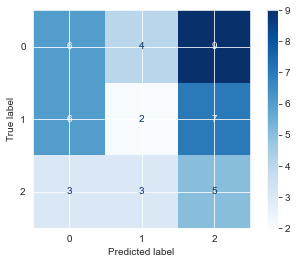

In [29]:
plot_confusion_matrix(dummy_clf, X_test, y_test, cmap=plt.cm.Blues)

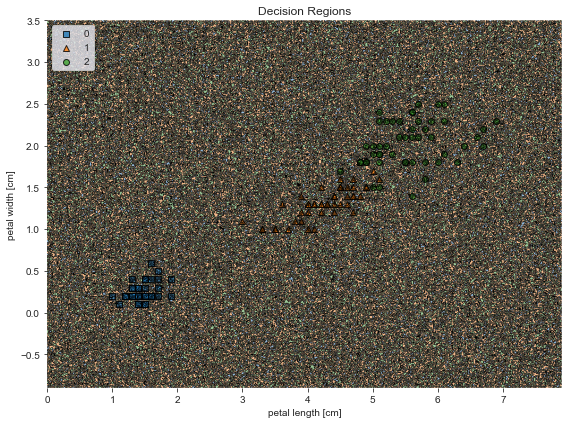

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))

plot_decision_regions(X, y, clf=dummy_clf, legend=2, ax=ax)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.title('Decision Regions')
plt.legend(loc='upper left')
plt.tight_layout()

## 1.3. K-Nearest Neighbors Classifier

### 1.3.1. Initiate and fit the model

In [31]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

### 1.3.2. Evaluate the model

In [32]:
knn_pred = knn_clf.predict(X_test)
knn_proba = knn_clf.predict_proba(X_test)

In [33]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.88      1.00      0.94        15
           2       1.00      0.82      0.90        11

    accuracy                           0.96        45
   macro avg       0.96      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45



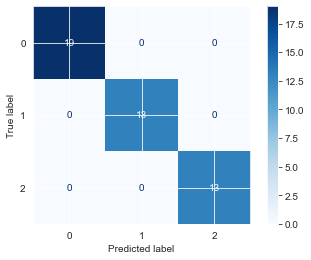

In [20]:
plot_confusion_matrix(knn_clf, X_test, y_test, cmap=plt.cm.Blues)

In [34]:
print('Accuracy: ', balanced_accuracy_score(y_test, knn_pred))
print('F1 score: ', f1_score(y_test, knn_pred, average='weighted'))
print('Log loss: ', log_loss(y_test, knn_proba))

Accuracy:  0.9393939393939394
F1 score:  0.9547222222222221
Log loss:  0.8082523968590902


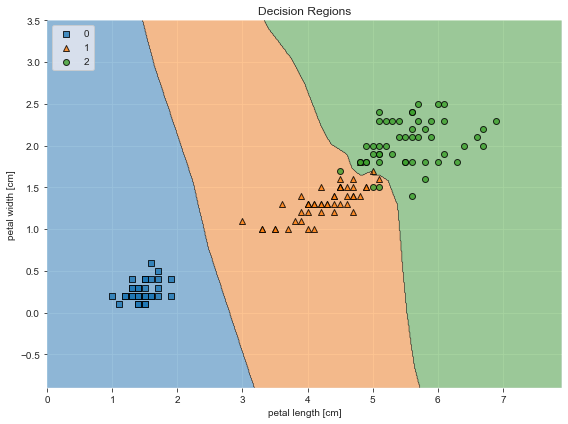

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))

plot_decision_regions(X, y, clf=knn_clf, legend=2, ax=ax)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.title('Decision Regions')
plt.legend(loc='upper left')
plt.tight_layout()

# 2. A more complex example

## 2.1. Load and prepare the data

In [36]:
# load the breast cancer dataset
breast_cancer = datasets.load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [37]:
# load breast cancer features and targets
df_breast_cancer = pd.DataFrame(data= np.c_[breast_cancer['data'], breast_cancer['target']],
                     columns= breast_cancer['feature_names'].tolist() + ['target'])
df_breast_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [38]:
print(len(breast_cancer.feature_names))

30


In [39]:
X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2.2. Logistic Regression Classifier

### 2.2.1. Initiate and fit the model

In [40]:
log_reg_clf = LogisticRegression(max_iter=100, random_state=42)
log_reg_clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

### 2.2.2. Evaluate the model

In [41]:
log_reg_pred = log_reg_clf.predict(X_test)
log_reg_proba = log_reg_clf.predict_proba(X_test)

In [42]:
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



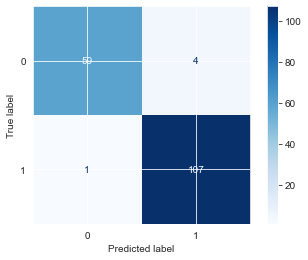

In [43]:
plot_confusion_matrix(log_reg_clf, X_test, y_test, cmap=plt.cm.Blues)

In [44]:
print('Accuracy: ', balanced_accuracy_score(y_test, log_reg_pred))
print('F1 score: ', f1_score(y_test, log_reg_pred, average='weighted'))
print('Log loss: ', log_loss(y_test, log_reg_proba))

Accuracy:  0.9636243386243386
F1 score:  0.970603923775359
Log loss:  0.08055617872005282


## 2.3. Gaussian Naive Bayes Classifier

### 2.3.1. Initiate and fit the model

In [45]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

GaussianNB()

### 2.3.2. Evaluate the model

In [46]:
gnb_pred = gnb_clf.predict(X_test)
gnb_proba = gnb_clf.predict_proba(X_test)

In [47]:
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



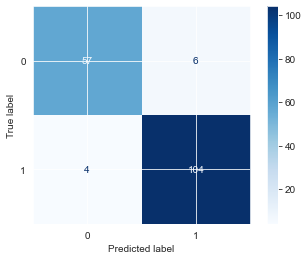

In [48]:
plot_confusion_matrix(gnb_clf, X_test, y_test, cmap=plt.cm.Blues)

In [49]:
print('Accuracy: ', balanced_accuracy_score(y_test, gnb_pred))
print('F1 score: ', f1_score(y_test, gnb_pred, average='weighted'))
print('Log loss: ', log_loss(y_test, gnb_proba))

Accuracy:  0.9338624338624338
F1 score:  0.9413171134406007
Log loss:  0.48986013210958895


## 2.4. K-Nearest Neighbors Classifier

### 2.4.1. Initiate and fit the model

In [50]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### 2.4.2. Evaluate the model

In [51]:
knn_pred = knn_clf.predict(X_test)
knn_proba = knn_clf.predict_proba(X_test)

In [52]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



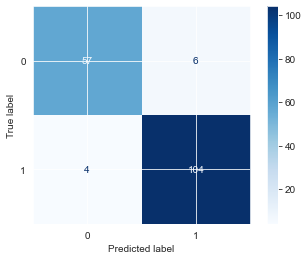

In [53]:
plot_confusion_matrix(knn_clf, X_test, y_test, cmap=plt.cm.Blues)

In [54]:
print('Accuracy: ', balanced_accuracy_score(y_test, knn_pred))
print('F1 score: ', f1_score(y_test, knn_pred, average='weighted'))
print('Log loss: ', log_loss(y_test, knn_proba))

Accuracy:  0.9338624338624338
F1 score:  0.9413171134406007
Log loss:  0.09507116545080345


### 2.4.3. Hyper-parameter tuning (optimization) with GridSearchCV

In [55]:
knn_clf = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25),
              'p': range(1, 5),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
knn_clf_grid = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=1, cv=None)
knn_clf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'p': range(1, 5), 'weights': ['uniform', 'distance']},
             verbose=1)

In [56]:
print('Best parameters: ', knn_clf_grid.best_params_)

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


In [57]:
knn_clf_best = knn_clf_grid.best_estimator_
knn_clf_best.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', p=1)

In [58]:
knn_best_pred = knn_clf_best.predict(X_test)
knn_best_proba = knn_clf_best.predict_proba(X_test)

In [59]:
print(classification_report(y_test, knn_best_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.95      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



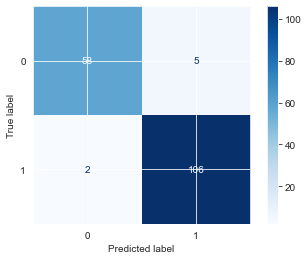

In [60]:
plot_confusion_matrix(knn_clf_best, X_test, y_test, cmap=plt.cm.Blues)

In [61]:
print('Accuracy: ', balanced_accuracy_score(y_test, knn_best_pred))
print('F1 score: ', f1_score(y_test, knn_best_pred, average='weighted'))
print('Log loss: ', log_loss(y_test, knn_best_proba))

Accuracy:  0.951058201058201
F1 score:  0.9588454932855025
Log loss:  0.08304101740672311


## 2.5. Cross-validation

In [62]:
log_reg_cross = cross_val_score(log_reg_clf, X, y, cv=5, n_jobs=-1)
print('Cross-validation scores (Accuracies): ', log_reg_cross)

Cross-validation scores (Accuracies):  [0.93859649 0.93859649 0.96491228 0.90350877 0.95575221]


/Users/wadieskaf/miniconda3/envs/base_39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wadieskaf/miniconda3/envs/base_39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

In [63]:
knn_cross = cross_val_score(knn_clf, X, y, cv=5, n_jobs=-1)
print('Cross-validation scores (Accuracies): ', knn_cross)

Cross-validation scores (Accuracies):  [0.88596491 0.93859649 0.93859649 0.94736842 0.92920354]


In [64]:
gnb_cross = cross_val_score(gnb_clf, X, y, cv=5, n_jobs=-1)
print('Cross-validation scores (Accuracies): ', gnb_cross)

Cross-validation scores (Accuracies):  [0.92105263 0.92105263 0.94736842 0.94736842 0.95575221]


# 3. Exercises

## 3.1. Exercise 1

### 1. Load the Wine dataset from sklearn.datasets and split it into train and test sets. Use 30% of the data for testing and a random state of 42.
### 2. Conduct Explorative Data Analysis (EDA) on the dataset and perform feature engineering if you see that it is necessary.
### 3. Train and compare the results of the following classifiers: Logistic Regression, Gaussian Naive Bayes, K-Nearest Neighbors, Decision Tree, Random Forest, and Support Vector Machine. Use the default parameters for each classifier.
### 4. Use GridSearchCV to find the best hyper-parameters for the K-Nearest Neighbors classifier, Random Forest classifier, and Support Vector Machine classifier. [Refer to the SKLearn documentation for details on the hyper-parameters for each model].
### 5. Use cross-validation to evaluate the classifiers after hyper-parameter tuning.

## 3.2. Exercise 2 (Do it at home)

### Pick any of the real word datasets from [here](https://scikit-learn.org/stable/datasets/real_world.html) and perform the same steps as in Exercise 1. Add to them the XGBoost classifier and compare the results with the other classifiers.